
# Handle Time Series Problem 

- 1.Month is Currently not in TimeSeries format,we need to Convert. (And use it as Index)
- 2.Checking for stationarity
- 3.Write Function for testing stationarity
- 4.Check Stationarity for ts(ts has our Data). <br>
    **if Data not Stationary (Making TS Stationary  by Estimating & Eliminating Trend).**
    - To Eliminate the Trend we Take LOG of the Data
    
    - Diff between log_data and moving avg.
    - Test Stationarity for : test_stationarity(ts_log_moving_avg_diff).
- 5.Take Exponentially Weighted Moving(EWM) Average <br>
     - Exponentially weighted avg - log of data.
     - Check test_stationarity(ts_log_ewma_diff)
- 6.We Conclude : ts_log_ewma_diff is the Best 
- 7.Eliminating Trend and Seasonality
- 8.Decomposition: <br>
 Divide the Data into : - Trend, - Seasonal,- Resudial (Noises/Errors)
- 9.Final Forecasting :  ACF & PACF Plots



## Loading and Handling TimeSeries in Pandas

In [49]:
import os
os.chdir("C:/Users/Abhishek/Desktop/Lets Upgrade Case Studies/TimeSeries Forecasting")

import warnings
warnings.filterwarnings('ignore')

In [50]:
from IPython.display import Image #Just to import the Defination IMage
#Image(filename="Stationary.png")
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.pylab import rcParams #Params for Graph
rcParams['figure.figsize'] = 15, 6 #Default Size

In [51]:
data = pd.read_csv('AirPassengers.csv')
print (data.head())
print( '\n Data Types:')
print(data.dtypes)

#Month is Currently not in TimeSeries format,we need to Convert

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


## 1. Month is Currently not in TimeSeries format,we need to Convert

In [52]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m') #datetime.strptime() :Convert "Dates" to Year&Month Format dateparse('1962-01')

#Parse_dates&Date_parser imp while reading TimeSries Data
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print (data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [53]:
# We will use the "Month" as INDEX now
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [55]:
# Store The Data is TS

ts = data["#Passengers"]
ts.head(10) # Year Month Day

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

### Indexing TS arrays: #if we give index as month, we will give the respective "No. of Passengers "

- We can use INdex to Fetch the specific #Passengers

In [56]:
#1. Specific the index as a string constant:
ts['1949-01-01']

112

In [57]:
#1. Specify the entire range:
ts['1949-01-01':'1949-08-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
Name: #Passengers, dtype: int64

In [58]:
#All rows of given Year e.x 1952:
ts['1952']

Month
1952-01-01    171
1952-02-01    180
1952-03-01    193
1952-04-01    181
1952-05-01    183
1952-06-01    218
1952-07-01    230
1952-08-01    242
1952-09-01    209
1952-10-01    191
1952-11-01    172
1952-12-01    194
Name: #Passengers, dtype: int64

---

# Checking for stationarity

### Rule for implementing TimeSeriesForescasting
- Data should be stationary..
- By nature no data has stationary format, We have to convert the data into stationary data then we can apply TimeSeries techniques.
- We cannot convert data to 100% stationary, we try to bring as close as possible.

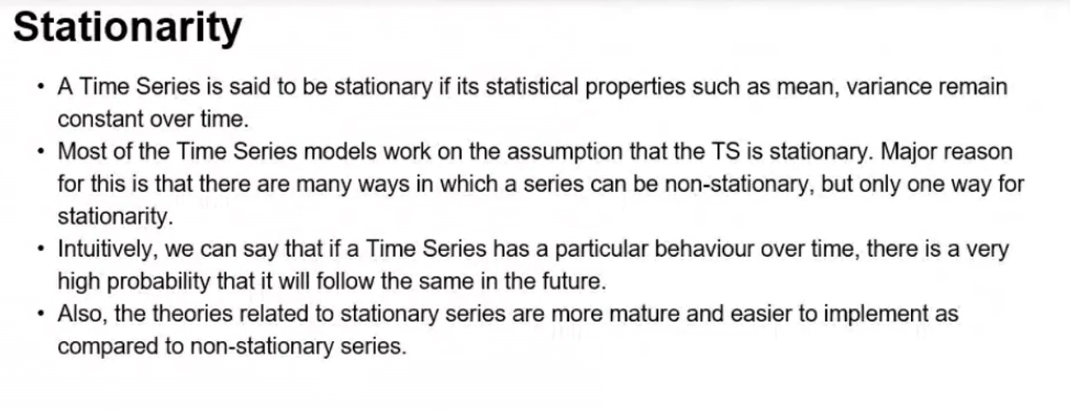

In [59]:
#Stationary Defination
Image(filename="Stationary.png")

### Plot the TimeSeries Data 

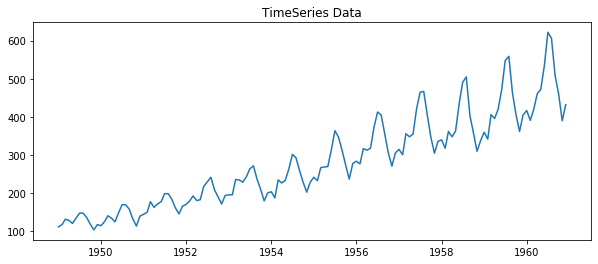

In [60]:
plt.figure(figsize=(10,4))
plt.title("TimeSeries Data")
plt.plot(ts)

In [61]:
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

## Function for testing stationarity

In [62]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()  # Rolling Mean of data supplied
    rolstd = timeseries.rolling(window=12).std()    # Rolling S.D. of data supplied

    #Plot rolling statistics:
    plt.figure(figsize=(12,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test: (Checks if Data is converted to Stationary or not)
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

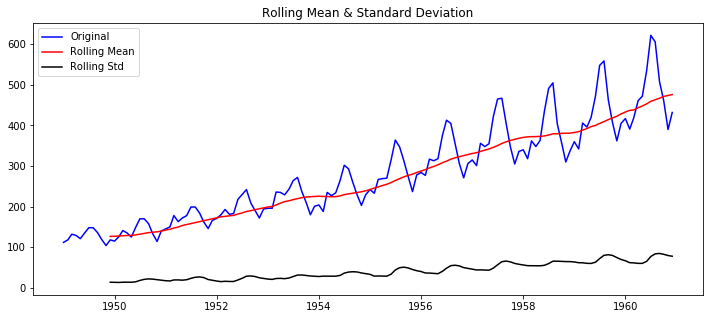

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [63]:
test_stationarity(ts)

# From the Graph we can see the Mean and S.D. is not Constant so it is not Stationary Data.
#Observe P-value : Lower value = Good (Our Value is High)

---

### Our Data is not Stationary

# Making TS Stationary


## Estimating & Eliminating Trend

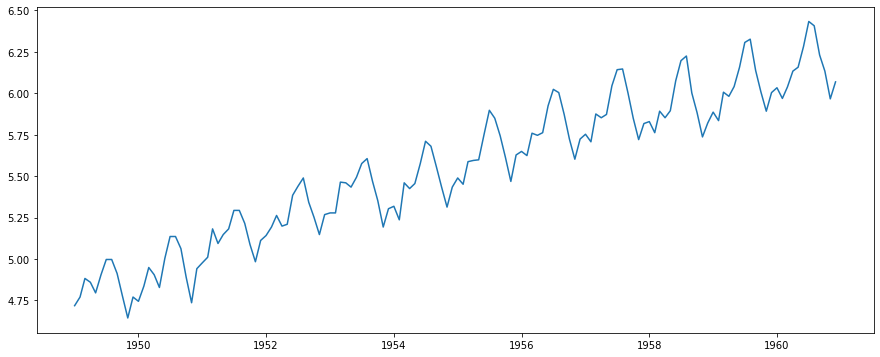

In [64]:
# To Eliminate the Trend we Take LOG of the Data
ts_log = np.log(ts)
plt.plot(ts_log) 

In [65]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

## Smoothing (on ts_log) :

### Moving average : Take Rolling Mean with Window=12

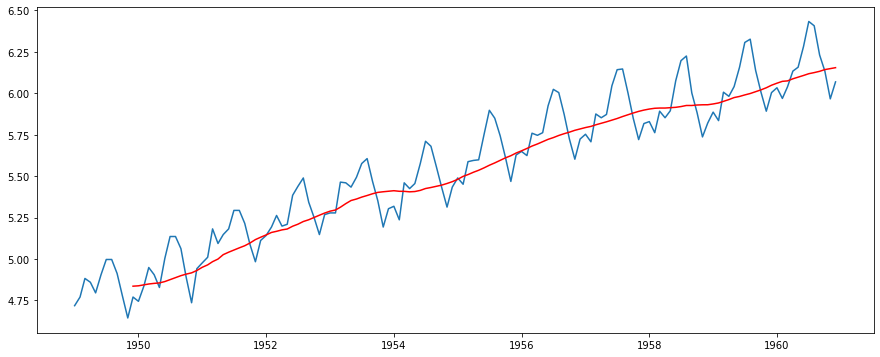

In [66]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

#Mean is still not Constant even after Taking log Data.
#So Data is still not Stationary.

In [67]:
# Diff between log_data and moving avg.
ts_log_moving_avg_diff = ts_log - moving_avg # first 12 will be nan because our window for moving_avg is 12
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [68]:
# Dropping NA values because we wont be avle to plot if there is missing Data
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

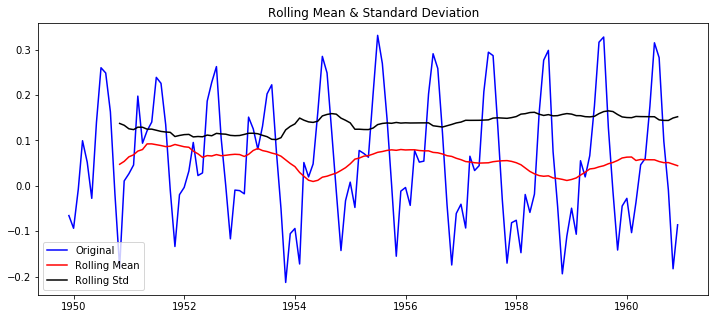

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [69]:
test_stationarity(ts_log_moving_avg_diff)

#Not totally constant, but is some what constant.
#P-Value is Reduced, so BETTER CHANCE that mean and S.D is constant and data is stationary.

---

### Exponentially Weighted Moving Average

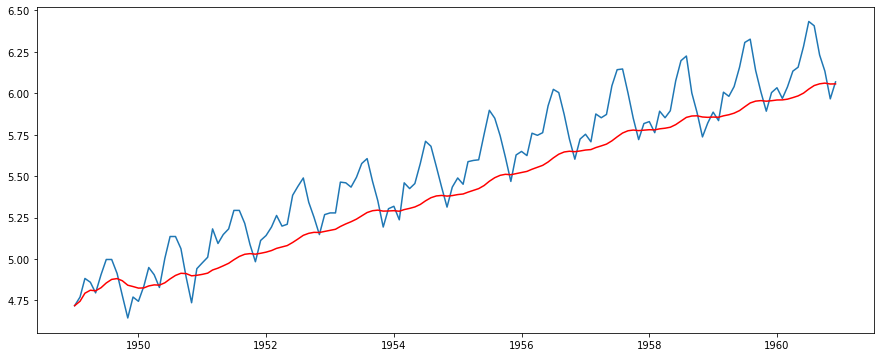

In [70]:
#ewm : exponentially weighted moving average. halflife : windowsize is 6 months

expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

#df.ewm(com=0.5).mean()

#Still Mean not Constant

In [71]:
expwighted_avg

Month
1949-01-01    4.718499
1949-02-01    4.745345
1949-03-01    4.793835
1949-04-01    4.811785
1949-05-01    4.808206
                ...   
1960-08-01    6.046445
1960-09-01    6.056778
1960-10-01    6.061079
1960-11-01    6.055750
1960-12-01    6.056461
Name: #Passengers, Length: 144, dtype: float64

In [72]:
ts_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

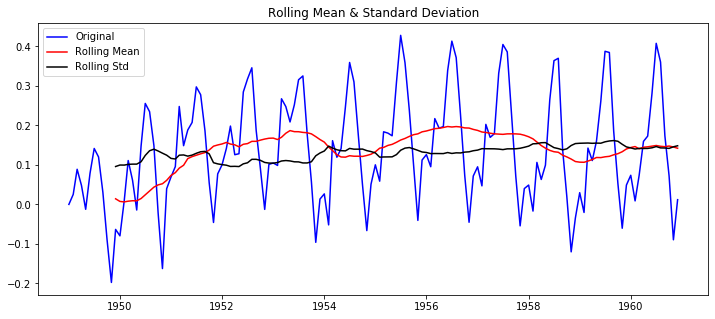

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [73]:
#Exponentially weighted avg - log of data.

ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Similar to previous Graph.
# P-Value is Smaller. i.e MUCH BETTER

In [74]:
ts_log_ewma_diff

Month
1949-01-01    0.000000
1949-02-01    0.025339
1949-03-01    0.088967
1949-04-01    0.048028
1949-05-01   -0.012415
                ...   
1960-08-01    0.360435
1960-09-01    0.173704
1960-10-01    0.072319
1960-11-01   -0.089603
1960-12-01    0.011964
Name: #Passengers, Length: 144, dtype: float64

### We Conclude : ts_log_ewma_diff is the Best 

---

## Eliminating Trend and Seasonality

### Differencing:

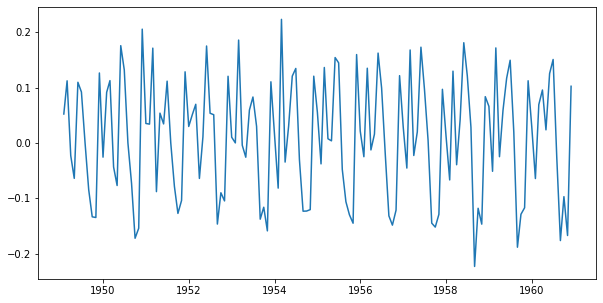

In [75]:
#Take first difference:
plt.figure(figsize=(10,5))
ts_log_diff = ts_log - ts_log.shift() #Shift means : Shifting values to one index below.
plt.plot(ts_log_diff)

#No Trend here now (Our aim was to remove trend and it is done)

<Figure size 864x432 with 0 Axes>

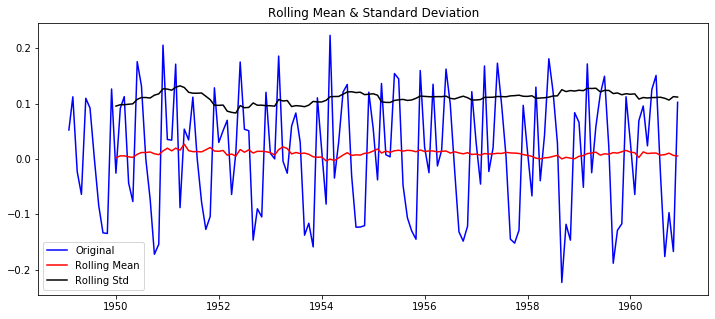

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [76]:
plt.figure(figsize=(12,6))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

#Mean and S.D look Constant
#p-value is a bit high.

---

### Decomposition:

#### Divide the Data into :

- Trend
- Seasonal
- Resudial (Noises/Errors)

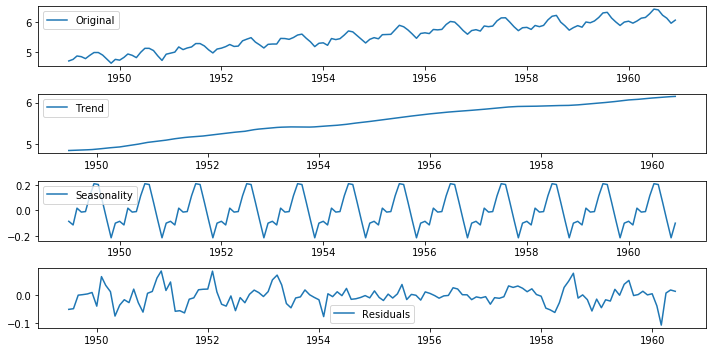

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log) #Taking Log Data.

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<Figure size 864x360 with 0 Axes>

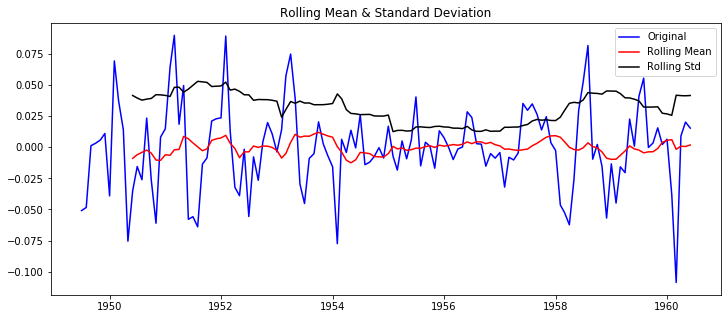

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [78]:
plt.figure(figsize=(12,5))
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose) #use Decompposed Data.

#Meand S.D are not constant
#P-value is Big (Bad)

# Final Forecasting

In [ ]:
#Build TimeSeries Forecasting Model
#ARIMA : Auto Regressive (AR) Integrated(I) Moving Average (MA)
from statsmodels.tsa.arima_model import ARIMA

### ACF & PACF Plots

- If ACF value is good, we can use AR (From ARIMA)Model
- If PACF value is good, we can use MA (From ARIMA)Model
- If both ACF&PACF value is good, we can use bith AR and MA model.

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:  
#plt.figure(figsize=(10,5))
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
#plt.figure(figsize=(10,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

- **ACF :**
-  Most of the Data points are outside the range -0.2 to 0.2. WHich means there is correlation i.e There is trend. 

- **PACF :**
- Most of the points are inside the given range -0.25 to 0.25

### AR Model:

In [ ]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(12,5))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(12,5))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

#Does Better JOB than AR and MA individually.
#Has least Residuals
#ARIMA is the best 

-

### Convert to original scale:

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA_log.head(10)

In [ ]:
ts_log.head(10)

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log) # Predicted trend.(yellow lines)

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [ ]:
predictions_ARIMA

In [ ]:
data

In [ ]:
results_ARIMA.plot_predict(1,384) #(1,384) means predict for next 384 months

#Confidence Interval : The predicted value(#Passenger) Lies between the Confidence INterval. 

In [ ]:
results_ARIMA.plot_predict(1,156)

In [ ]:
x=results_ARIMA.forecast(steps=156)

In [ ]:
x